This is a quick demo of K-Means

K-Means is classification algorithm that minimizes error by minimizes within cluster sum-of-square errors, or *interia*.

You must tell the algo how many cluster centers (or means) there are, and from there it will train on the data and minimize inertia.

It works well when the data set is normally distributed (Gaussian) given that it is minimizing a general interia around a mean. Odd shaped data sets do respond well as their distribution most likely won't follow a normal variance from the means.

It works by 
1. selecting a center
2. Defining segments
3. Moving to the center to the mean of the segment

This repeats until the move is less than the tolerance.

It should be noted that models reached may be a local min only.

When variance, size, or other constants are not equal or similar, the algorithm responds poorly.

In [2]:
# Example here based on work by Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause 

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

We are going to make four different types of datasets and show some issues with K-Means including:
1. When you select the wrong number of means (wrong K)
2. When the data is anisotropicly distributed
3. Unequal variance of the data
4. Uneven size of the data

We will create a dataset of 1500 "blobs" that has 3 centers.

In [3]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

We will then build a model on assuming K=2 rather than 3

In [4]:
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

In [5]:
plt.figure(figsize=(12, 12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

Text(0.5, 1.0, 'Wrong K')

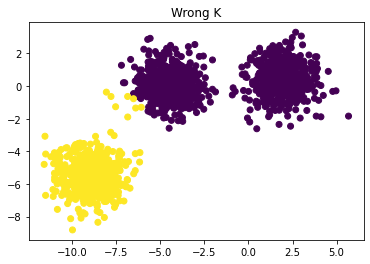

In [6]:
plt.subplot(111)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Wrong K")

Next we will create an anisotropicly distributed set

In [7]:
shift = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_an = np.dot(X, shift)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_an)

Text(0.5, 1.0, 'Anisotropicly Distributed')

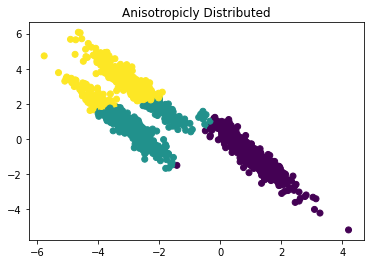

In [8]:
plt.subplot(111)
plt.scatter(X_an[:, 0], X_an[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed")

Now we will make the blobs with different standard deviations

In [9]:
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1, 0.5, 2],
                                random_state=random_state)

In [10]:
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

Text(0.5, 1.0, 'Differing Standard Deviation')

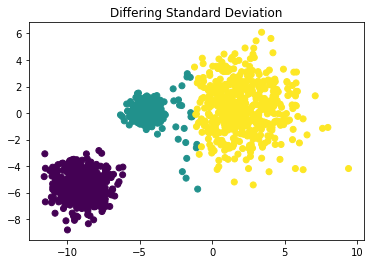

In [11]:
plt.subplot(111)
plt.scatter(X_varied[:,0], X_varied[:,1], c=y_pred)
plt.title("Differing Standard Deviation")

Sample

In [12]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [13]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

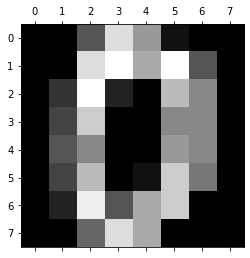

In [14]:
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

In [15]:
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

In [16]:
data = scale(digits.data)
data.shape

(1797, 64)

In [17]:
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [18]:
n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

In [19]:
model = KMeans(n_clusters=n_digits)

In [20]:
model.fit(data)

KMeans(n_clusters=10)

In [21]:
y_pred = model.predict(data[0:63])

In [22]:
y_pred

array([4, 9, 9, 3, 5, 3, 0, 8, 3, 3, 4, 1, 7, 3, 5, 2, 0, 8, 9, 3, 4, 1,
       9, 3, 1, 2, 0, 1, 9, 3, 4, 3, 2, 2, 0, 2, 4, 3, 9, 3, 9, 5, 1, 8,
       8, 3, 2, 1, 4, 4, 9, 1, 8, 9, 1, 4, 1, 9, 0, 3, 3, 8, 3],
      dtype=int32)

In [24]:
labels[0:63]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3])